<font size="2">
Task 1 notebook - Data science assignment - Andela <br>  author: Joaquín Tempelsman  <br>
date: june 2022 
</font> 



In [2]:
import sys
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(1,'../src')
#from data_prep import get_preproccessed_data
from preprocessing_funcs import *

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
%%time
journeys_df, utilization_df = get_preproccessed_data('../data/', EDA=True)

2022-06-13 22:48:36,340 - root - INFO - preprocessing raw data
2022-06-13 22:48:36,341 - root - INFO - reading journeys data
2022-06-13 22:48:36,440 - root - INFO - reading utilization data
2022-06-13 22:48:37,265 - root - INFO - running data prep 1 on journeys data
2022-06-13 22:48:38,636 - root - INFO - running data prep 1 on utilization data
2022-06-13 22:48:55,785 - root - INFO - running data prep 2 on journey_prep1 data
2022-06-13 22:50:41,632 - root - INFO - data preprocessing complete, returning train dataframe to train module


CPU times: user 2min 3s, sys: 1.57 s, total: 2min 5s
Wall time: 2min 5s


# Demand exploration

/var/folders/x9/43v98775057b7qprfvn951c00000gp/T/ipykernel_46051/3621803932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SFO_df['reservation_lead_time_cuartile'] = pd.qcut(SFO_df['reservation_lead_time'], 4, labels=False)


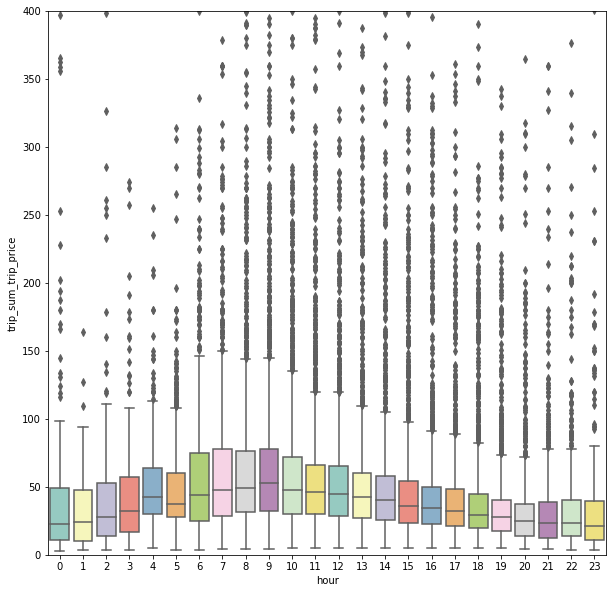

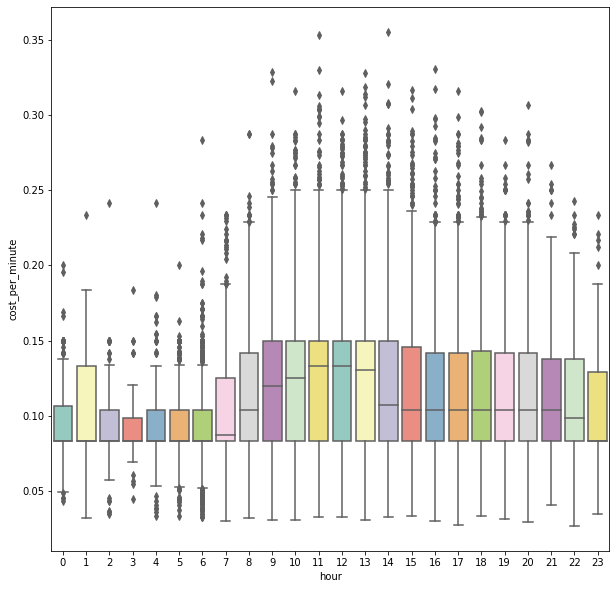

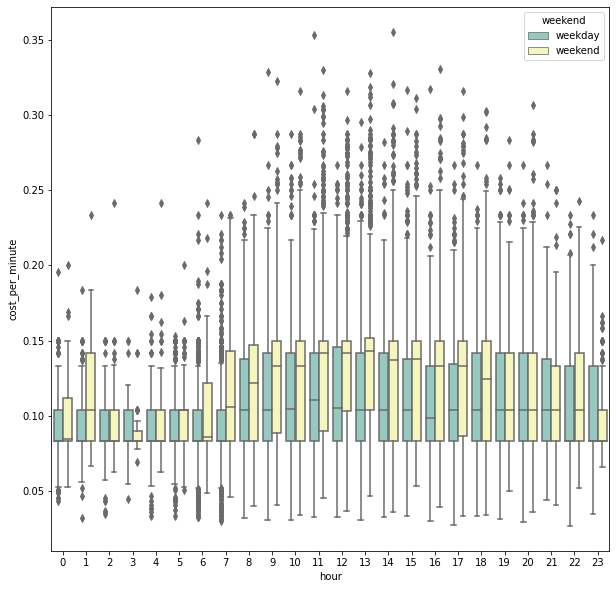

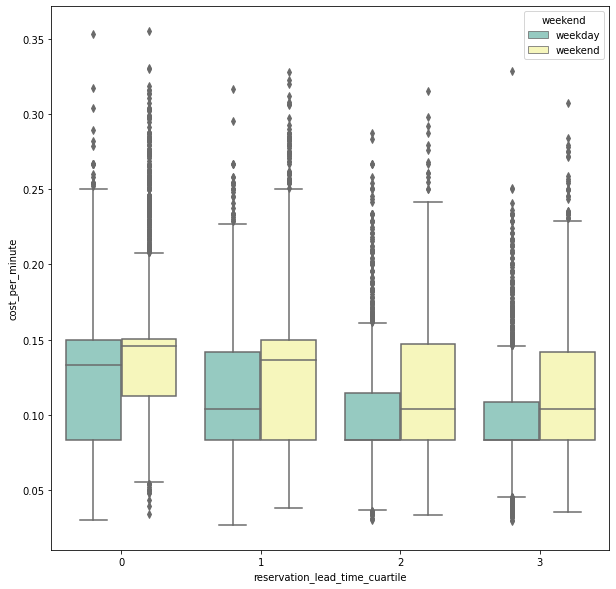

In [3]:
SFO_df = journeys_df.loc[journeys_df.car_parking_address_city == 'San Francisco']
SFO_df['reservation_lead_time_cuartile'] = pd.qcut(SFO_df['reservation_lead_time'], 4, labels=False)

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="hour", y="trip_sum_trip_price", data=SFO_df, palette="Set3")
ax.set(ylim=(0, 400))
plt.show()

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="hour", y="cost_per_minute", data=SFO_df, palette="Set3")
plt.show()

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="hour", y="cost_per_minute", data=SFO_df, palette="Set3", hue='weekend')
plt.show()


plt.figure(figsize=(10,10))
ax = sns.boxplot(x="reservation_lead_time_cuartile", y="cost_per_minute", data=SFO_df, palette="Set3", hue='weekend')
plt.show()

/var/folders/x9/43v98775057b7qprfvn951c00000gp/T/ipykernel_46051/3944841279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_df['reservation_lead_time_cuartile'] = pd.qcut(scatter_df['reservation_lead_time'], 4, labels=False)


<AxesSubplot:xlabel='cost_per_minute', ylabel='trip_duration'>

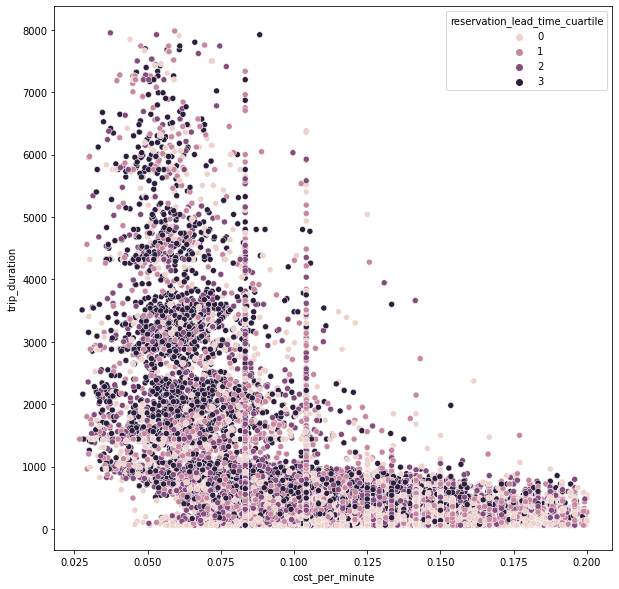

In [4]:
scatter_df = journeys_df.loc[(journeys_df.cost_per_minute < 0.2) & (journeys_df.trip_duration < 8000)]
scatter_df['reservation_lead_time_cuartile'] = pd.qcut(scatter_df['reservation_lead_time'], 4, labels=False)



#plt.figure(figsize=(20,15))
#plt.rcParams["figure.figsize"] = (20,20)
#plot =sns.jointplot(data=scatter_df, x="cost_per_minute", y="trip_duration", hue='reservation_lead_time_cuartile', alpha=0.5)


plt.figure(figsize=(10,10))
sns.scatterplot(data=scatter_df, x="cost_per_minute", y="trip_duration", hue="reservation_lead_time_cuartile")

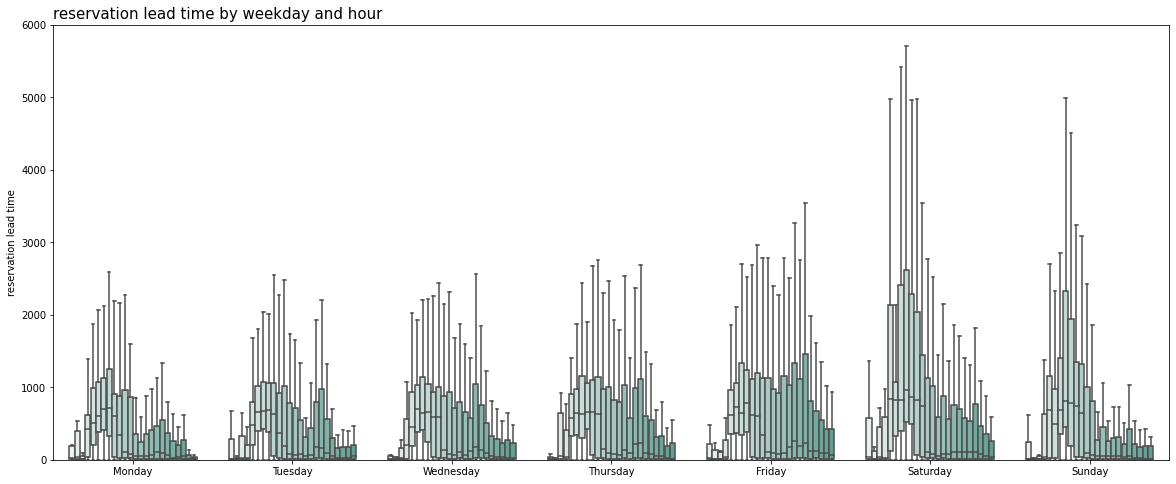

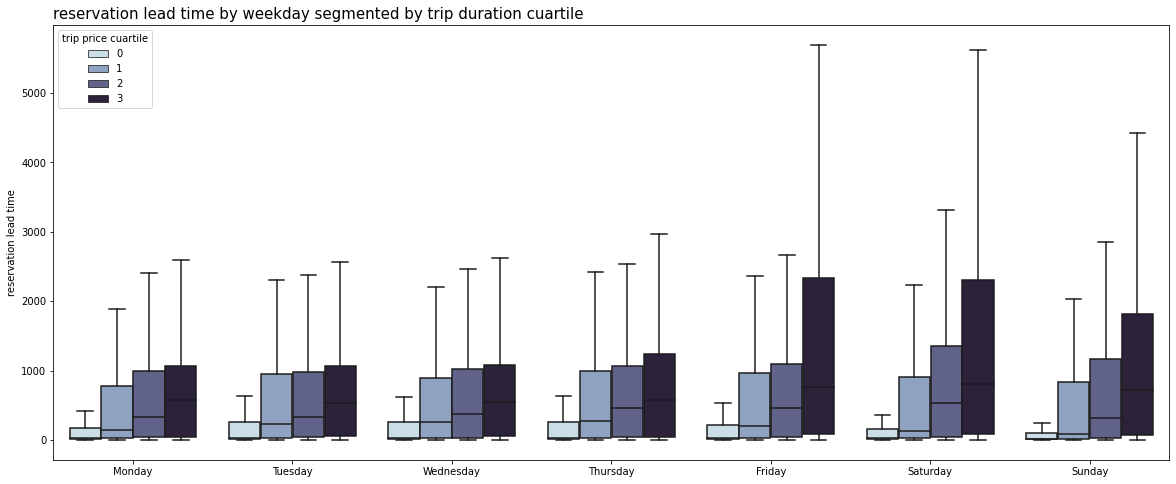

In [5]:
sns.cubehelix_palette(as_cmap=True)


boxplot_df = journeys_df[['hour','reservation_lead_time','weekday','trip_sum_trip_price', 'trip_duration','trip_start_at_local_time']].copy()

boxplot_df['day_week_nr'] = journeys_df.trip_start_at_local_time.dt.day_of_week
boxplot_df.sort_values(by='day_week_nr', inplace=True)
boxplot_df['trip_price_cuartile'] = pd.qcut(boxplot_df['trip_sum_trip_price'], 4, labels=False)
boxplot_df['trip_duration_cuartile'] = pd.qcut(boxplot_df['trip_duration'], 4, labels=False)

plt.figure(figsize=(20,8))
ax = sns.boxplot(x="weekday", y="reservation_lead_time",hue='hour', data=boxplot_df, palette=sns.color_palette("light:#5A9", 24)
, showfliers=False)

ax.set_title('reservation lead time by weekday and hour', loc='left',fontsize=15)     
ax.set(ylim=(0, 6000))
ax.set(ylabel='reservation lead time', xlabel='')
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# sns.move_legend(
#     ax, "upper left",
#     bbox_to_anchor=(1, 1), ncol=1, title='trip duration cuartile', frameon=True,
# )
ax.legend().remove()

plt.savefig("lead_time_v_weekday.png")
plt.show()

plt.figure(figsize=(20,8))
ax = sns.boxplot(x="weekday", y="reservation_lead_time",hue='trip_duration_cuartile', data=boxplot_df, palette="ch:s=.25,rot=-.25" ,showfliers=False)
ax.set_title('reservation lead time by weekday segmented by trip duration cuartile', loc='left',fontsize=15)     
#ax.set(ylim=(0, ))
ax.set(ylabel='reservation lead time', xlabel='')
sns.move_legend(
    ax, "upper left", ncol=1, title='trip price cuartile', frameon=True,
)
plt.savefig("lead_time_v_duration.png")
plt.show()

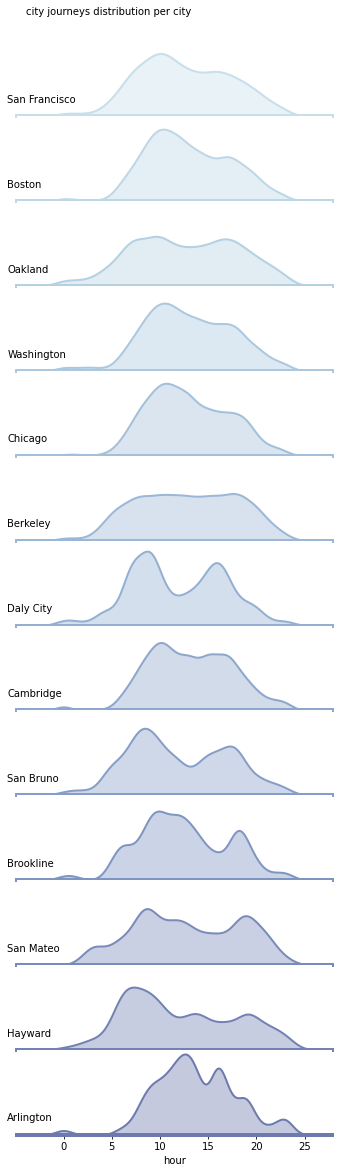

In [6]:
ridge_plot_df = journeys_df[['car_parking_address_city','hour']].copy()

def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.03, .2, label, color="black",
            ha="left", va="center", transform=ax.transAxes)

ridge_plot = sns.FacetGrid(ridge_plot_df, row="car_parking_address_city", hue="car_parking_address_city", aspect=4, height=1.25, palette=sns.color_palette("ch:s=.25,rot=-.25", 24))
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "hour", clip_on=False, shade=True, alpha=0.4, lw=2, bw=.2).set(ylabel=None)
ridge_plot.map(plt.axhline, y=0, lw=4, clip_on=False)
ridge_plot.map(label, "hour")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.00)
# Remove axes details that don't play well with overlap
ridge_plot.set_titles("")
ridge_plot.set(yticks=[])
#ridge_plot.set_xlabel("CO2 Emission",fontsize=30)
ridge_plot.despine(bottom=True, left=True)
#ridge_plot.axes#[0,1].xaxis.set_ticks_position("top")
ridge_plot.fig.suptitle('city journeys distribution per city', fontsize=10, x=0.35, y=1)

ridge_plot.savefig("ridgeplot_city.png")

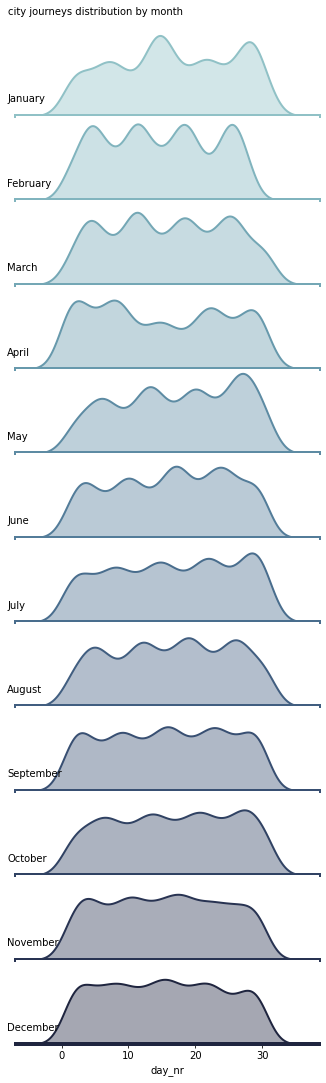

In [7]:
ridge_plot_df2 = journeys_df[['month','month_name','day_nr']].sort_values(by=['month'])
pal = sns.cubehelix_palette(len(ridge_plot_df2.month_name.unique()), rot=-.25, light=.7)


def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.03, .2, label, color="black",
            ha="left", va="center", transform=ax.transAxes)

ridge_plot = sns.FacetGrid(ridge_plot_df2, row="month_name", hue="month_name", aspect=4, height=1.25, palette=pal)
# Draw the densities in a few steps
ridge_plot.map(sns.kdeplot, "day_nr", clip_on=False, shade=True, alpha=0.4, lw=2, bw=.2).set(ylabel=None)
ridge_plot.map(plt.axhline, y=0, lw=4, clip_on=False)
ridge_plot.map(label, "day_nr")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.00)
# Remove axes details that don't play well with overlap
ridge_plot.set_titles("")
ridge_plot.set(yticks=[])
#ridge_plot.set_xlabel("CO2 Emission",fontsize=30)
ridge_plot.despine(bottom=True, left=True)
#ridge_plot.axes#[0,1].xaxis.set_ticks_position("top")
ridge_plot.fig.suptitle('city journeys distribution by month', fontsize=10, x=0.35, y=1)

ridge_plot.savefig("ridgeplot_month.png")

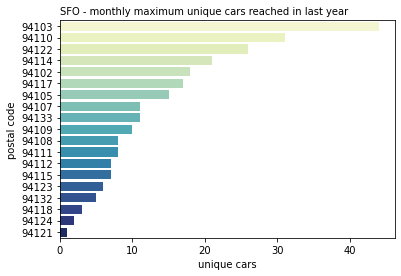

In [8]:
unique_cars_df = utilization_df.groupby(['car_parking_address_postcode','car_parking_address_city','month_nr'])['car_id_hash'].nunique().reset_index()
max_unique_cars_df_month = unique_cars_df.loc[unique_cars_df.car_parking_address_city =='San Francisco'].groupby('car_parking_address_postcode')['car_id_hash'].max().sort_values(ascending=False)
max_unique_cars_df_month.name = 'month_max_unique_cars'
max_unique_cars_df_month.index = max_unique_cars_df_month.index.astype(int).astype(str)

ax = sns.barplot(y=max_unique_cars_df_month.index, x=max_unique_cars_df_month.values, palette='YlGnBu')
ax.set(xlabel='unique cars', ylabel='postal code')
ax.set_title('SFO - monthly maximum unique cars reached in last year', loc='left',fontsize=10)     
plt.savefig("barplot_cars_available_sfo.png")

<Figure size 1440x576 with 0 Axes>

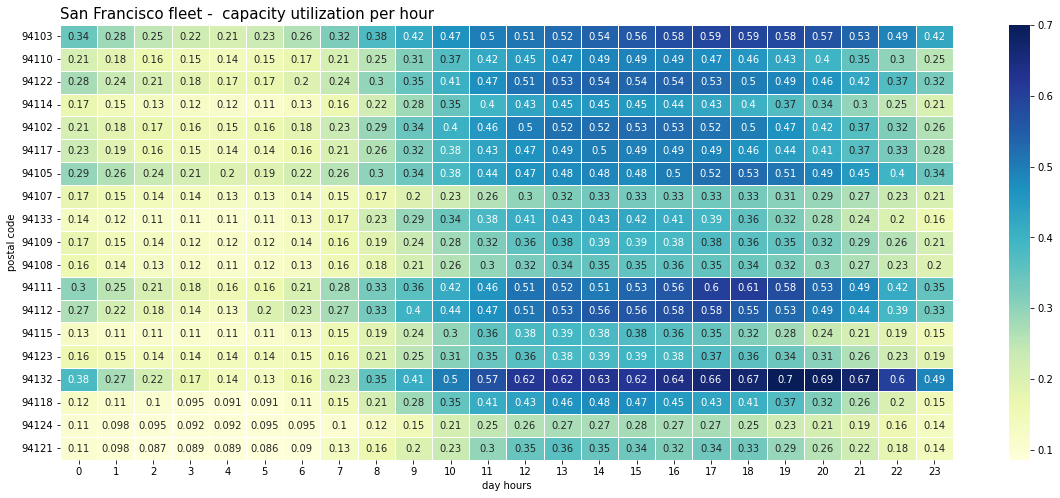

In [9]:
max_unique_cars_df_month.index = max_unique_cars_df_month.index.astype(int)
SFO_heatmap_df = utilization_df.loc[utilization_df.car_parking_address_city == 'San Francisco']
#SFO_heatmap_df =SFO_heatmap_df.groupby(['car_parking_address_postcode','hour']).median()['hourly_capacity_usage'].reset_index()
SFO_heatmap_df =SFO_heatmap_df.groupby(['car_parking_address_postcode','hour']).sum()[['car_hourly_utilization_sum_utilized_minutes', 'car_hourly_utilization_sum_available_minutes']].reset_index()
SFO_heatmap_df['relative_used_capacity'] = SFO_heatmap_df['car_hourly_utilization_sum_utilized_minutes'] / SFO_heatmap_df['car_hourly_utilization_sum_available_minutes']
SFO_heatmap_pivot = pd.pivot_table(SFO_heatmap_df, values='relative_used_capacity', index='car_parking_address_postcode', columns='hour')
SFO_heatmap_pivot.index = SFO_heatmap_pivot.index.astype(int)
SFO_heatmap_pivot = SFO_heatmap_pivot.merge(max_unique_cars_df_month, how='left', left_index=True, right_index=True)
SFO_heatmap_pivot.sort_values(by='month_max_unique_cars', inplace=True, ascending=False)
SFO_heatmap_pivot.drop(columns=['month_max_unique_cars'], inplace=True)

plt.figure(figsize=(20,8))
f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(SFO_heatmap_pivot, annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")
ax.set(xlabel='day hours', ylabel='postal code')
ax.set_title('San Francisco fleet -  capacity utilization per hour', loc='left',fontsize=15)     
plt.savefig("heatmap_capacity_sfo.png")